In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-12-09 / Aki Taanila


# Määrällisen muuttujan luokiteltu jakauma

Tässä muistiossa käytän **seaborn**-funktioita **histplot** ja **displot**.

Kaavioiden muotoiluun käytän **matplotlib.pyplot**-funktioita. Jos kaipaat lisää muotoiluja, niin lue https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

tips = sns.load_dataset('tips') # Esimerkkidata ravintolaseurueiden tipeistä
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Luokiteltu jakauma

**histplot** esittää määrällisen muuttujan luokitellun jakauman histogrammina.

Lisätietoa https://seaborn.pydata.org/generated/seaborn.histplot.html

<Axes: xlabel='total_bill', ylabel='Count'>

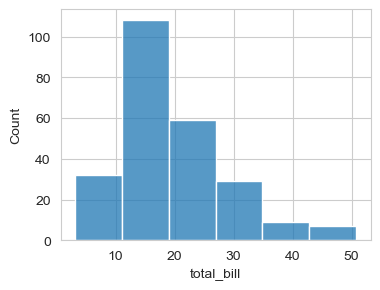

In [3]:
plt.figure(figsize=(4, 3))
# bins-parametrilla voin määrittää luokkien lukumäärän
sns.histplot(data=tips, x='total_bill', bins=6)

**bins**-parametrilla voin määrittää luokkien lukumäärien sijasta myös täsmälliset luokkarajat listana. Luokkarajoja tulkitaan seuraavasti:
* Luokkien alarajat sisältyvät luokkaan, mutta ylärajat eivät.
* Poikkeuksena viimeisen luokan yläraja sisältyy luokkaan.

Text(0, 0.5, 'lukumäärä')

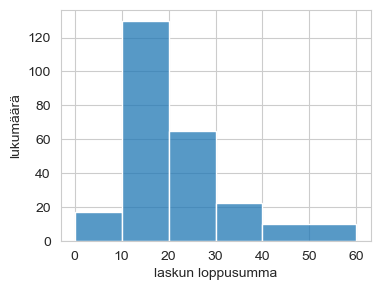

In [4]:
bins = [0, 10, 20, 30, 40, 60]
plt.figure(figsize=(4, 3))
sns.histplot(data=tips, x='total_bill', bins=bins)

plt.xlabel('laskun loppusumma')
plt.ylabel('lukumäärä')

## Usean muuttujan histogrammit samaan kuvioon

Text(0.5, 0, 'juomaraha')

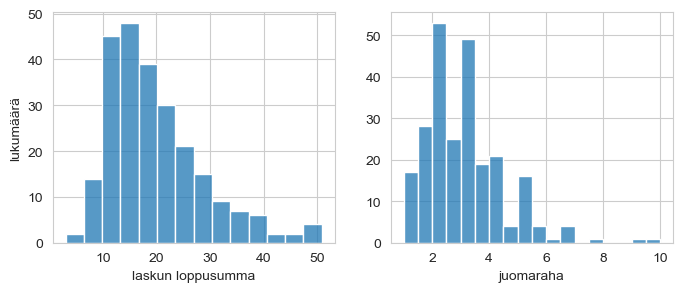

In [5]:
# Lista muuttujista
muuttujat = ['total_bill', 'tip']

# Kuvio, joka sisältää muuttujat-listan määrittämän määrän kaavioita
fig, axs = plt.subplots(nrows=1, ncols=len(muuttujat), figsize=(8, 3))

# Käydään muuttujat-lista läpi: i=järjestysnumero, muuttuja=muuttujan nimi
for i, muuttuja in enumerate(muuttujat):
    sns.histplot(data=tips, x=muuttuja, ax=axs[i])
    axs[i].set_ylabel('')
    
axs[0].set_ylabel('lukumäärä')    # ylabel vain ensimmäiselle kaaviolle
axs[0].set_xlabel('laskun loppusumma')
axs[1].set_xlabel('juomaraha')

## displot

**displot** mahdollistaa histogrammien tarkastelun muiden kategoristen muuttujien määrittämissä ryhmissä. **kind**-parametrin arvo **'hist'** määrittää että kaaviolajina on **histplot**.

Seuraavassa tarkastelen tipin (**tip**) suuruutta sukupuolen (**sex**) ja tupakoinnin (**smoker**) määrittämissä ryhmissä.

Lisätietoa https://seaborn.pydata.org/generated/seaborn.displot.html

**displot** tuottaa **Facetgrid**-luokan olion, jolla on omat funktionsa otsikointien ym. ominaisuuksien muotoiluun.
Lisätietoa https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

Text(0.5, 1.0, 'tupakoimaton nainen')

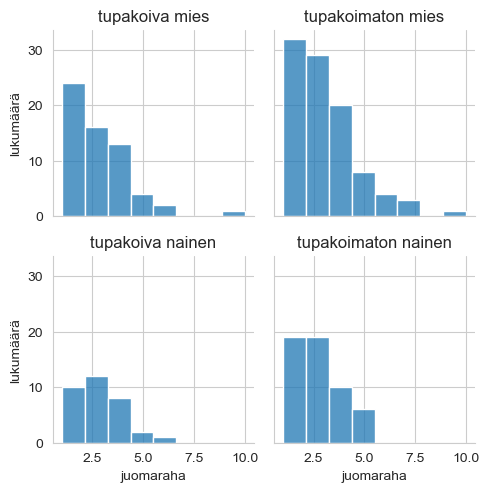

In [6]:
g = sns.displot(data=tips, x='tip', row='sex', col='smoker', kind='hist', bins=8, height=2.5)

g.set_axis_labels('juomaraha', 'lukumäärä')

axes = g.axes.flatten()    # Litistetään 2x2 kaaviomatriisin kaaviot listaksi
axes[0].set_title('tupakoiva mies')
axes[1].set_title('tupakoimaton mies')
axes[2].set_title('tupakoiva nainen')
axes[3].set_title('tupakoimaton nainen')